<a href="https://colab.research.google.com/github/satishsalyal/neuralnetwork/blob/master/Develop_Word_Embeddings_in_Python_with_Gensim_bold_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to Develop Word Embeddings in Python with **Gensim** **bold text**

In [18]:

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [4]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [6]:
# train model
model = Word2Vec(sentences, min_count=1)

In [16]:
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [9]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [10]:
# access vector for one word
print(model['sentence'])

[-2.77261087e-03 -8.80646170e-04  3.23566399e-03  4.09557112e-03
 -1.50181074e-03 -3.34531243e-04  4.51609446e-03 -1.99009641e-03
 -8.57573468e-04 -1.15691382e-03 -4.81211767e-03 -4.95716790e-03
  2.62038177e-03  3.16183968e-03  8.89223826e-04  2.92948354e-03
  4.15375922e-03  4.65984270e-03 -3.95730510e-03  4.99153882e-03
 -2.12561758e-03  2.30716239e-03  9.80837387e-04  4.41142451e-03
 -4.15079482e-03 -3.09075508e-03  7.81109440e-04 -1.74779608e-03
 -2.37129454e-04  1.92865252e-03 -3.37284338e-03 -1.12045316e-04
 -3.18067585e-04  1.17093429e-03 -4.78066085e-03  1.70517201e-03
 -2.25036615e-03  2.67025083e-03 -3.91693972e-03  3.43058165e-03
 -2.31724884e-03  3.95888742e-03  3.88729456e-03 -6.16247824e-04
  1.50094344e-03  4.38282499e-03  3.33565497e-03 -6.50099537e-04
 -3.13357217e-03 -2.00228160e-03 -3.61545268e-03 -1.93933153e-03
 -4.48856689e-03 -1.08648022e-03 -7.99352347e-05 -4.67240438e-03
  2.93578138e-03 -2.84600793e-03 -3.49738123e-03  4.72585810e-03
  1.03746809e-03 -3.17077

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [14]:
# save model
model.save('model.bin')

In [15]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [19]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


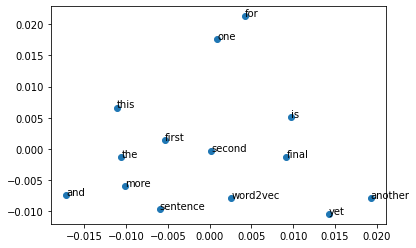

In [20]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()